This notebook is part of the various tests for scimap. It's intended to allow for visual evaluation of fits, etc.

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import pandas as pd
import xanespy
import numpy as np

from skimage import transform

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing SSRL Dataset


In [6]:
xanespy.import_ssrl_frameset(directory='ssrl-txm-data/', hdf_filename='imported-ssrl-data.h5')

 Importing frames: 100%|██████████| 26/26 [00:02<00:00, 11.05it/s]Saving to HDF5 file imported-ssrl-data.h5 in group ssrl-test-data_rep1

Remember to run XanesFrameset.correct_magnification()


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.72753906  0.72753906  0.72753906  0.72753906  0.72753906  0.72753906
   0.72753906  0.72753906  0.72753906  0.72753906]
 [ 0.72753906  0.72753906  0.72753906  0.72753906  0.72753906  0.72753906
   0.72753906  0.72753906  0.72753906  0.72753906]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.  

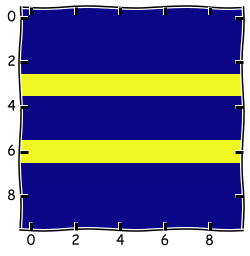

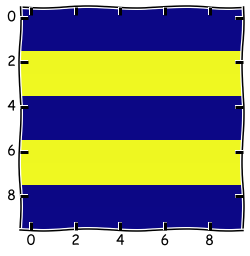

In [113]:
from skimage.transform import SimilarityTransform, warp

img = np.array([[0,0,0,0,0],
                [0,1,1,1,0],
                [0,1,0,1,0],
                [0,1,1,1,0],
                [0,0,0,0,0]], dtype=np.float)
img = np.array([[1,1,1,0,0],
                [1,0,1,0,0],
                [1,1,1,0,0],
                [0,0,0,0,0],
                [0,0,0,0,0]], dtype=np.float)
# img = np.zeros((16, 16))
# img[[6,9],:] = 1
# print(img)
# img[:,[6,10]] = 1

img = np.zeros((10, 10))
img[[3,6], :] = 1
print(img)

plt.imshow(img, interpolation="none", cmap="plasma")
t = SimilarityTransform(scale=0.75, translation=2.25/2)
img2 = warp(img, t,order=3)
plt.figure()
plt.imshow(img2, interpolation="none", cmap="plasma")
print(img2)

In [14]:
img = np.array([[0,0,0,0,0],
                [0,1,1,1,0],
                [0,1,0,1,0],
                [0,1,1,1,0],
                [0,0,0,0,0]], dtype=np.float)
t = transform.SimilarityTransform(translation=(1, 1))
%timeit transform.warp(img, t)
print(img2)

10000 loops, best of 3: 24.1 µs per loop
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  0.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


3.2

/home/mwolf/src/xanespy/xanes_frameset.py:1257: UserWarning: use spectrum()
  warnings.warn(UserWarning('use spectrum()'))


fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_cur

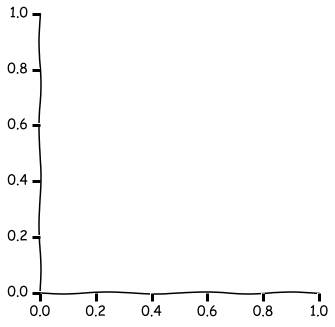

In [2]:
fs = xanespy.XanesFrameset(filename='imported-ssrl-data.h5', edge=xanespy.k_edges['Ni_NCA'])
fs.gtk_viewer()

Center: 8352.3149176
Goodness of fit: 0.002070405398038423


(8340, 8360)

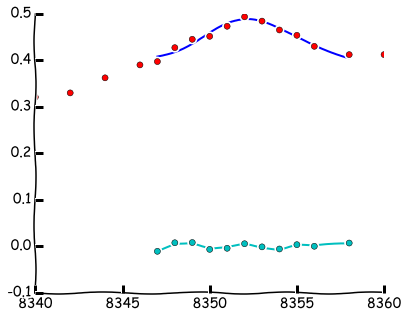

In [2]:
xanes_spectrum = pd.Series.from_csv('testdata/NCA-cell2-soc1-fov1-xanesspectrum.tsv', sep='\t')
(peak, goodness) = fit_whiteline(xanes_spectrum, width=5)  
peak.plot_fit()

fit = peak.fit_list[0]

print("Center:", peak.center())
print("Goodness of fit:", goodness)
residuals = peak.residuals(observations=xanes_spectrum[8347:8358])
xanes_spectrum.plot(ax=plt.gca(), marker='o', linestyle="None")
residuals.plot(ax=plt.gca(), marker='o')

plt.xlim(8340, 8360)